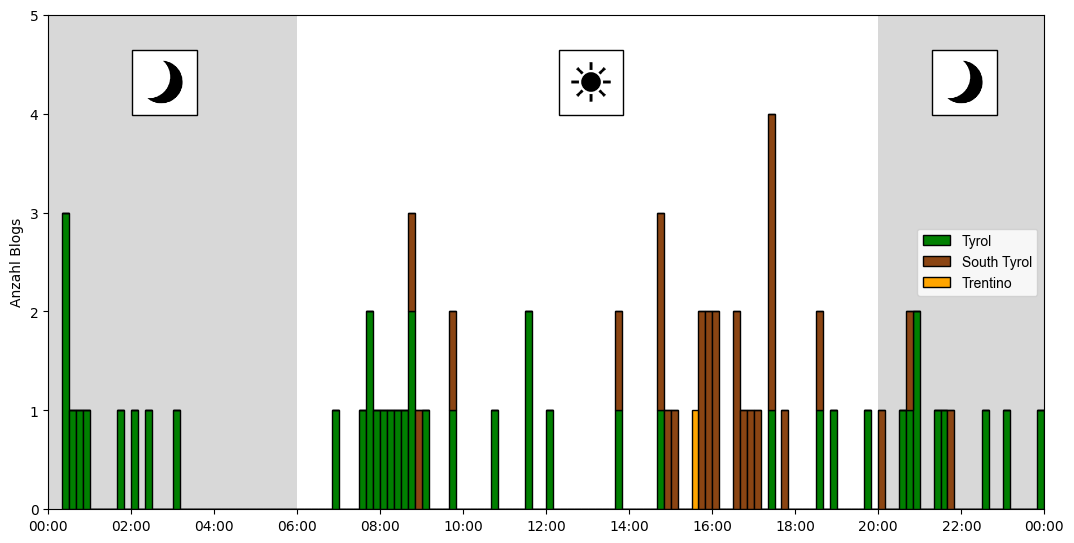

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import datetime
from datetime import date, timedelta
from matplotlib.offsetbox import OffsetImage, AnnotationBbox

filename_blog = '2022-23_blogs.csv'
intervall_min = 10
warndienst_list = ['Tyrol','South Tyrol','Trentino']
y_max = 5
out_dir = 'output'
filename = 'blog_statistics'

bar_width = intervall_min/60/24
intervall = str(intervall_min)+'min'
# Load the CSV file
df = pd.read_csv('data/'+filename_blog, delimiter=';')

# Convert 'Uhrzeit' column to datetime format
df['Uhrzeit'] = pd.to_datetime(df['Uhrzeit'], format='%H:%M')

min_time = df['Uhrzeit'].min().floor(intervall)
max_time = df['Uhrzeit'].max().floor(intervall)
time_range = pd.date_range(min_time, max_time, freq=intervall)

print_start = datetime.datetime(1900, 1, 1, 0, 0)
print_morning = datetime.datetime(1900, 1, 1, 6, 0)
print_evening = datetime.datetime(1900, 1, 1, 20, 0)
print_end = datetime.datetime(1900, 1, 2, 0, 0)

df_sum = pd.DataFrame(columns=['Uhrzeit','Tyrol','South Tyrol','Trentino'])
df_sum['Uhrzeit'] = time_range
df_sum['Tyrol'] = 0
df_sum['South Tyrol'] = 0
df_sum['Trentino'] = 0


for index, row in df.iterrows():
    time = row['Uhrzeit'].floor(intervall)
    warndienst = row['Warndienst']
    df_sum.loc[df_sum['Uhrzeit'] == time, warndienst] += 1

fig, ax = plt.subplots(1,1,figsize=(12,6))
plt.rcParams["font.family"] = "Arial"

plt.axvspan(print_start, print_morning, facecolor='grey', alpha=0.3)
plt.axvspan(print_evening, print_end, facecolor='grey', alpha=0.3)

ax.bar(df_sum['Uhrzeit'], df_sum['Tyrol'], bar_width, align='edge', color='green', edgecolor='black', label='Tyrol')
ax.bar(df_sum['Uhrzeit'], df_sum['South Tyrol'], bar_width, align='edge', color='saddlebrown', edgecolor='black', bottom=df_sum['Tyrol'], label='South Tyrol')
ax.bar(df_sum['Uhrzeit'], df_sum['Trentino'], bar_width, align='edge', color='orange', edgecolor='black', bottom=df_sum['Tyrol'] + df_sum['South Tyrol'], label='Trentino')

# Set labels and title
ax.set_ylabel('Anzahl Blogs')

ax.xaxis.set_major_locator(mdates.HourLocator(interval = 2))
ax.xaxis.set_major_formatter(mdates.DateFormatter('%H:%M'))
#ax.set_xticks(x)
#ax.set_xticklabels(df_sum['Uhrzeit'], rotation=45)
ax.legend(loc='center right')

arr_img = plt.imread('data/moon.png')
im = OffsetImage(arr_img, zoom=.4)
ab = AnnotationBbox(im, (1, 0), xycoords='axes fraction', box_alignment=(17,-7.5))
ax.add_artist(ab)
arr_img = plt.imread('data/moon.png')
im = OffsetImage(arr_img, zoom=.4)
ab = AnnotationBbox(im, (1, 0), xycoords='axes fraction', box_alignment=(2,-7.5))
ax.add_artist(ab)
arr_img = plt.imread('data/sun.png')
im = OffsetImage(arr_img, zoom=.4)
ab = AnnotationBbox(im, (1, 0), xycoords='axes fraction', box_alignment=(9,-7.5))
ax.add_artist(ab)

plt.xlim([print_start, print_end])
plt.ylim([0,y_max])
plt.tight_layout()
fig.savefig(f'{out_dir}/{filename}.png', facecolor='w', edgecolor='w', format='png', dpi=300)